In [1]:
import pandas as pd
import hvplot.pandas
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nba_data_df = pd.read_csv('./2021-2022 NBA Player Stats - Regular.csv', encoding= 'Latin1', delimiter=';')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
nba_data_df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,0.439,0.8,2.1,0.359,2.9,6.1,0.468,0.486,1.1,1.8,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,0.0,0.0,0.000,2.8,5.0,0.548,0.547,1.4,2.6,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,0.0,0.1,0.000,7.3,12.9,0.562,0.557,4.6,6.1,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,0.2,1.5,0.125,1.5,2.6,0.560,0.424,0.6,1.0,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,0.550,0.3,1.0,0.304,5.1,8.8,0.578,0.566,1.9,2.2,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


In [4]:
# Keep only the numerical values together 
numerical_data = nba_data_df.iloc[:, 5:]
numerical_data.head()

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,73,28,23.6,3.6,8.3,0.439,0.8,2.1,0.359,2.9,6.1,0.468,0.486,1.1,1.8,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,76,75,26.3,2.8,5.1,0.547,0.0,0.0,0.000,2.8,5.0,0.548,0.547,1.4,2.6,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,56,56,32.6,7.3,13.0,0.557,0.0,0.1,0.000,7.3,12.9,0.562,0.557,4.6,6.1,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,32,0,11.3,1.7,4.1,0.402,0.2,1.5,0.125,1.5,2.6,0.560,0.424,0.6,1.0,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,47,12,22.3,5.4,9.7,0.550,0.3,1.0,0.304,5.1,8.8,0.578,0.566,1.9,2.2,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


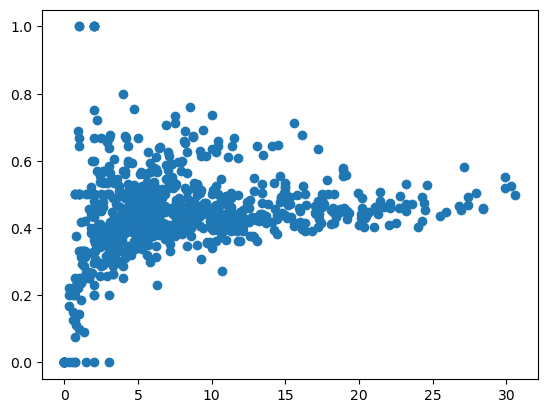

In [5]:
import matplotlib.pyplot as plt
plt.scatter(nba_data_df['PTS'], nba_data_df['FG%'])

In [6]:
nba_data_df.hvplot.scatter(
    x = 'MP',
    y = 'TRB',
    by = 'Pos'
)

:NdOverlay   [Pos]
   :Scatter   [MP]   (TRB)

In [8]:
# Multiple Regression Test (Pts)
import matplotlib.pyplot as plt 
import seaborn as sns 
pts_df = numerical_data.iloc[:, 3:16]
sns.pairplot(pts_df)

In [7]:
nba_data_df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

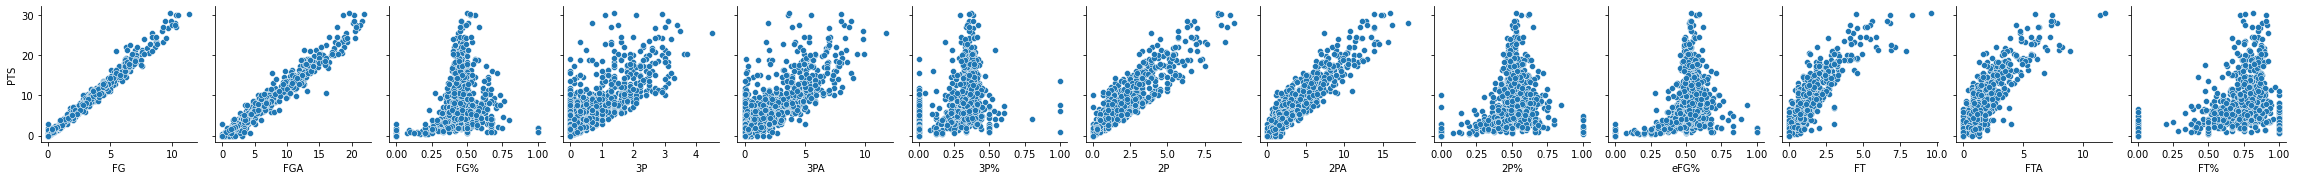

In [8]:
# Visualize relationship between features and responses using scatterplots 
sns.pairplot(nba_data_df, x_vars = ['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%'], y_vars = 'PTS')      

In [11]:
# Split the data into x and y variable 
from sklearn.model_selection import train_test_split
x = pts_df
y = nba_data_df['PTS']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 100)

In [12]:
pts_df.tail()

,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%
807,2.6,5.5,0.465,0.7,1.7,0.395,1.9,3.9,0.495,0.524,0.5,1.0,0.481
808,9.4,20.3,0.460,3.1,8.0,0.382,6.3,12.3,0.512,0.536,6.6,7.3,0.904
809,2.3,4.4,0.526,0.0,0.2,0.091,2.3,4.2,0.547,0.528,0.7,1.1,0.623
810,1.9,3.3,0.567,0.0,0.1,0.000,1.9,3.2,0.593,0.567,1.4,1.8,0.776
811,4.1,6.5,0.626,0.0,0.0,0.000,4.1,6.5,0.626,0.626,2.2,3.0,0.727


In [13]:
# Coefficients 
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm = lm.fit(x_train, y_train)
coeff = pd.DataFrame(lm.coef_, x_test.columns, columns= ['Coefficient'])
print(lm.intercept_) 
coeff

-0.014284623557575316


,Coefficient
FG,1.609658
FGA,-0.015503
FG%,-0.254283
3P,1.342996
3PA,0.029389
3P%,0.015146
2P,0.385076
2PA,0.019026
2P%,-0.018360
eFG%,0.283973


In [14]:
lm_pred = lm.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score
lm_mse = mean_squared_error(y_test, lm_pred)
lm_r2 = r2_score(y_test, lm_pred)
print(f"Mean Squared Error: {lm_mse}")
print(f"R Squared: {lm_r2}")

Mean Squared Error: 0.005095614787417389
R Squared: 0.9998684361355397


In [17]:
# Checking for P-Value 
import statsmodels.api as sm
x_train_constant = x_train
x_train_constant = sm.add_constant(x_train_constant)
ols = sm.OLS(y_train,x_train_constant).fit()
ols.params

const   -0.014285
FG       1.609658
FGA     -0.015503
FG%     -0.254283
3P       1.342996
3PA      0.029389
3P%      0.015146
2P       0.385076
2PA      0.019026
2P%     -0.018360
eFG%     0.283973
FT       0.984393
FTA      0.014308
FT%     -0.020871
dtype: float64

In [18]:
# P-values less than 0.05 is statistically significant with pts (reject null)
print(ols.summary())
# From the test results, we can see that only FG, 3P, 2P, FT have p-vaues less than 0.05 

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.627e+05
Date:                Fri, 30 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:15:14   Log-Likelihood:                 768.57
No. Observations:                 609   AIC:                            -1509.
Df Residuals:                     595   BIC:                            -1447.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0143      0.013     -1.130      0.2

<AxesSubplot:>

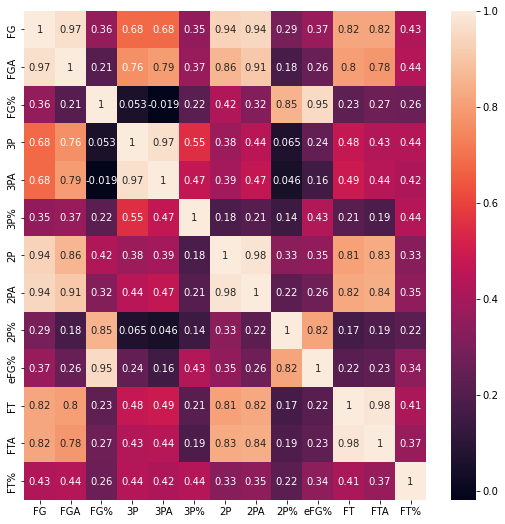

In [37]:
plt.figure(figsize = (9,9))
sns.heatmap(pts_df.corr(), annot= True)

In [23]:
# Removing all of the insignificant variables and keeping only the significant ones 
x_train_condensed = x_train[['FG', '3P', '2P', 'FT']]
x_test_condensed = x_test[['FG', '3P', '2P', 'FT']]
lm.fit(x_train_condensed, y_train)
lm_condensed_preds = lm.predict(x_test_condensed)


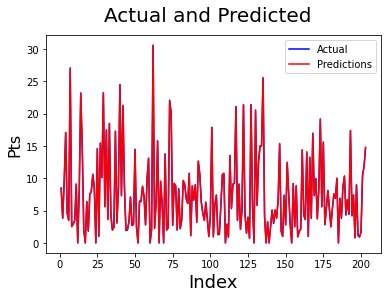

In [47]:
#Actual vs Predicted Points 
c = [i for i in range(1,204,1)]
fig = plt.figure()
plt.plot(c,y_test, color = 'blue', label = 'Actual')
plt.plot(c,lm_condensed_preds, color = 'red', label = 'Predictions')
fig.suptitle('Actual and Predicted', fontsize = 20)
plt.xlabel('Index', fontsize = 18)
plt.ylabel('Pts', fontsize = 16)
plt.legend()

Text(0, 0.5, 'y_test-y_pred')

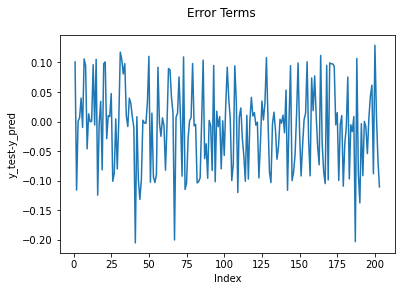

In [42]:
#Error Graph 
fig = plt.figure()
plt.plot(c, y_test - lm_pred)
fig.suptitle('Error Terms')
plt.xlabel('Index')
plt.ylabel('y_test-y_pred')

In [43]:
# MSE and r2 score with new predictions 
mse_new = mean_squared_error(y_test, lm_condensed_preds)
r2_new = r2_score(y_test, lm_condensed_preds)
print(f"Mean Squared Error: {mse_new}")
print(f"R2 Score: {r2_new}")

Mean Squared Error: 0.00508134781091048
R2 Score: 0.9998688044951276


In [46]:
x_train_final = x_train_condensed
x_train_final = sm.add_constant(x_train_final)
lm_final = sm.OLS(y_train, x_train_final).fit()
print(lm_final.summary())
# To calculate value, ( conef of constant + coef of column * column = coef of column * column )

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.162e+06
Date:                Fri, 30 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:48:23   Log-Likelihood:                 759.73
No. Observations:                 609   AIC:                            -1509.
Df Residuals:                     604   BIC:                            -1487.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.564e-05      0.005     -0.007      0.9

In [3]:
from sklearn.model_selection import train_test_split
nba_data_df.head()
X1 = nba_data_df[['GS', 'MP', 'FG', '3P', '3PA', '3P%', '2P', 'FT']]
y1 = nba_data_df['PTS']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=78)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

In [5]:
#Predict player's ppg as close as possible with deep learning model 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=16, activation='relu', input_dim = 8))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 721 (2.82 KB)
Trainable params: 721 (2.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])

In [8]:
model.fit(X1_train_scaled, y1_train, epochs= 50)

Epoch 1/50
20/20 [==============================] - 1s 4ms/step - loss: 99.1345 - mae: 7.9885 - mse: 99.1345
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 89.0896 - mae: 7.5363 - mse: 89.0896
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 77.1363 - mae: 7.0301 - mse: 77.1363
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 60.7450 - mae: 6.3222 - mse: 60.7450
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 42.8454 - mae: 5.4193 - mse: 42.8454
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss: 25.6729 - mae: 4.2969 - mse: 25.6729
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 14.7645 - mae: 3.2366 - mse: 14.7645
Epoch 8/50
20/20 [==============================] - 0s 3ms/step - loss: 10.7541 - mae: 2.7127 - mse: 10.7541
Epoch 9/50
20/20 [==============================] - 0s 3ms/step - loss: 9.4648 - mae: 2.5450 - mse: 9.4648
Epoch 10/50
20/20 [==

In [9]:
predictions = model.predict(X1_test_scaled)

7/7 [==============================] - 0s 1ms/step


In [68]:
ppg_df = pd.DataFrame(y1_test)
ppg_df['Predicted_PTS'] = predictions
ppg_df.head()

,PTS,Predicted_PTS
751,17.6,17.539268
167,27.9,28.967592
527,2.5,4.040474
754,9.0,7.767639
67,2.4,2.146729


In [6]:
model_2 = tf.keras.models.Sequential()
model_2.add(tf.keras.layers.Dense(units=8, activation='relu', input_dim = 8))
model_2.add(tf.keras.layers.Dense(units=16, activation='relu'))
model_2.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [7]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 233 (932.00 Byte)
Trainable params: 233 (932.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model_2.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mae', 'mse'])

In [10]:
model_2.fit(X1_train_scaled, y1_train, epochs= 50)

Epoch 1/50
20/20 [==============================] - 2s 3ms/step - loss: 7.4613 - mae: 7.4613 - mse: 89.8094
Epoch 2/50
20/20 [==============================] - 0s 6ms/step - loss: 7.2600 - mae: 7.2600 - mse: 84.8436
Epoch 3/50
20/20 [==============================] - 0s 5ms/step - loss: 7.0314 - mae: 7.0314 - mse: 79.3246
Epoch 4/50
20/20 [==============================] - 0s 5ms/step - loss: 6.7567 - mae: 6.7567 - mse: 72.6877
Epoch 5/50
20/20 [==============================] - 0s 6ms/step - loss: 6.4123 - mae: 6.4123 - mse: 64.9002
Epoch 6/50
20/20 [==============================] - 0s 7ms/step - loss: 5.9810 - mae: 5.9810 - mse: 55.6414
Epoch 7/50
20/20 [==============================] - 0s 6ms/step - loss: 5.4470 - mae: 5.4470 - mse: 44.9166
Epoch 8/50
20/20 [==============================] - 0s 5ms/step - loss: 4.7510 - mae: 4.7510 - mse: 33.0877
Epoch 9/50
20/20 [==============================] - 0s 6ms/step - loss: 3.8256 - mae: 3.8256 - mse: 20.6512
Epoch 10/50
20/20 [=========

In [12]:
predictions_2 = model_2.predict(X1_test_scaled)

7/7 [==============================] - 0s 3ms/step


In [14]:
ppg_df_2 = pd.DataFrame(y1_test)
ppg_df_2['Predicted_PTS'] = predictions_2
ppg_df_2.head()

,PTS,Predicted_PTS
751,17.6,17.584089
167,27.9,27.832830
527,2.5,4.103762
754,9.0,8.929539
67,2.4,2.471826
